In [1]:
#5th trial
#Will try to combine train/test data with weather data(-4weeks), since it is the weather 4 weeks prior that
    #matters to the breeding of mosquitoes rather than the day of trap collection
#Keep dummy weather codes, PCA, 
#Do a "event over sampling" to train the model better to predict virus

In [2]:
import pandas as pd
import numpy as np
weather = pd.read_csv('../assets/weather_2.csv')

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Pre-processing weather data

In [4]:
pd.options.display.max_columns = None
weather.head(2)

,Date,Year,Month,Day,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-01,2007,5,1,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0 days 04:48:00.000000000,0 days 18:49:00.000000000,0.0,29.14,29.820,2.20,26.0,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-02,2007,5,2,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0 days 04:47:00.000000000,0 days 18:50:00.000000000,0.0,29.41,30.085,13.15,3.0,13.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG',
       'FG+', 'MIFG', 'SQ', 'SN', 'VCFG', 'GR'],
      dtype='object')

In [6]:
weather['Sunrise'] = pd.to_timedelta(weather['Sunrise'])
weather['Sunset'] = pd.to_timedelta(weather['Sunset'])

In [7]:
#Feature engineering: Daylight 
weather['Daylight'] = weather['Sunset'] - weather['Sunrise']

In [8]:
weather = weather.drop(['Sunset','Sunrise'],axis=1)

In [9]:
#changing Daylight back to float, numbers are in mintues!
weather['Daylight'] = weather['Daylight'].astype('timedelta64[m]')

In [10]:
from pandas import Timestamp

weather['Date'] = pd.to_datetime(weather['Date'])
weather['Week'] = weather['Date'].dt.week

In [11]:
weather.head(2)

,Date,Year,Month,Day,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,Daylight,Week
0,2007-05-01,2007,5,1,83.5,51.0,67.5,14.0,51.0,56.5,0.0,2.5,0.0,29.14,29.820,2.20,26.0,9.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,841.0,18
1,2007-05-02,2007,5,2,59.5,42.5,51.5,-3.0,42.0,47.0,13.5,0.0,0.0,29.41,30.085,13.15,3.0,13.4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,843.0,18


In [12]:
#pushing the weather data to 4weeks later we will see the consequences 
weather['Week'] += 4

In [13]:
weather.columns

Index(['Date', 'Year', 'Month', 'Day', 'Tmax', 'Tmin', 'Tavg', 'Depart',
       'DewPoint', 'WetBulb', 'Heat', 'Cool', 'PrecipTotal', 'StnPressure',
       'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed', 'BR', 'HZ', 'RA',
       'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG', 'FG+', 'MIFG', 'SQ', 'SN',
       'VCFG', 'GR', 'Daylight', 'Week'],
      dtype='object')

In [14]:
#This is to prepare the data to be merged with train/test data

weather_2 = weather.groupby(['Year','Week']).agg({'Month':'max',
                                                   'Tmax':'mean',
                                                   'Tmin':'mean', 
                                                   'Tavg':'mean', 
                                                   'Depart':'mean', 
                                                   'DewPoint':'mean',
                                                   'WetBulb':'mean',
                                                   'Heat': 'mean',
                                                   'Cool':'mean',
                                                   'PrecipTotal':'mean',
                                                   'StnPressure':'mean',
                                                   'SeaLevel':'mean',
                                                   'ResultSpeed':'mean',
                                                   'ResultDir':'mean',
                                                   'AvgSpeed':'mean',
                                                   'Daylight':'mean',
                                                   'BR':'max', 
                                                   'HZ':'max', 
                                                   'RA':'max',
                                                   'TSRA':'max',
                                                   'VCTS':'max',
                                                   'FU':'max',
                                                   'TS':'max',
                                                   'DZ':'max',
                                                   'BCFG':'max',
                                                   'FG+':'max',
                                                   'MIFG':'max',
                                                   'SQ':'max',
                                                   'SN':'max',
                                                   'VCFG':'max',
                                                   'GR':'max'})


weather_2

Month       Tmax       Tmin       Tavg     Depart   DewPoint  \
Year Week                                                                 
2007 22        5  69.250000  49.083333  59.416667   4.333333  40.500000   
     23        5  75.642857  52.142857  64.000000   7.000000  45.857143   
     24        5  73.857143  48.785714  61.571429   2.285714  40.785714   
     25        5  79.142857  56.285714  67.928571   5.571429  49.285714   
     26        6  82.357143  63.285714  73.142857   8.285714  58.642857   
     27        6  77.071429  56.500000  67.000000   0.428571  52.285714   
     28        6  88.142857  65.428571  77.000000   8.142857  55.785714   
     29        6  78.785714  64.000000  71.642857   1.000000  56.071429   
     30        7  80.928571  62.500000  71.928571   0.142857  59.285714   
     31        7  86.000000  66.071429  76.214286   4.000000  59.714286   
     32        7  83.000000  63.642857  73.571429   0.285714  56.500000   
     33        7  80.357143  63.357143  72.071429  -2.142857  59.357143   
     34        7  82.857143  66.428571  74.928571   0.714286  61.000000   
     35        8  88.285714  68.142857  78.571429   5.142857  61.571429   
     36        8  87.357143  71.357143  79.571429   6.285714  69.714286   
     37        8  76.928571  64.785714  71.214286  -1.428571  60.714286   
     38        8  82.500000  67.142857  75.071429   4.428571  66.142857   
     39        9  81.571429  61.928571  72.000000   2.285714  58.357143   
     40        9  84.642857  67.428571  76.214286   8.571429  61.928571   
     41        9  69.857143  47.928571  59.071429  -6.142857  43.071429   
     42        9  82.142857  59.857143  71.214286   7.714286  53.857143   
     43        9  79.285714  57.571429  68.500000   8.000000  52.500000   
     44       10  80.500000  61.357143  71.214286  13.285714  59.785714   
     45       10  64.285714  49.071429  56.928571   2.000000  43.500000   
     46       10  72.571429  53.571429  63.285714  11.285714  50.357143   
     47       10  58.500000  43.571429  51.214286   2.571429  39.571429   
     48       10  63.000000  40.833333  52.166667   5.666667  35.666667   
2008 22        5  67.250000  45.750000  56.875000   2.750000  45.375000   
     23        5  66.214286  46.000000  56.357143   0.142857  40.785714   
     24        5  63.928571  43.928571  54.214286  -4.142857  41.500000   
...          ...        ...        ...        ...        ...        ...   
2013 46       10  57.285714  43.428571  50.642857  -1.857143  42.714286   
     47       10  49.571429  32.285714  41.142857  -8.142857  28.357143   
     48       10  59.625000  42.375000  51.125000   4.000000  46.250000   
2014 22        5  60.750000  45.500000  53.500000  -2.750000  37.250000   
     23        5  74.928571  51.285714  63.285714   5.285714  46.142857   
     24        5  63.071429  47.000000  55.285714  -3.857143  43.214286   
     25        5  77.071429  54.357143  66.071429   3.857143  48.500000   
     26        6  82.928571  59.142857  71.285714   6.571429  55.714286   
     27        6  78.428571  58.928571  68.928571   3.000000  50.000000   
     28        6  76.357143  57.928571  67.428571  -1.428571  51.571429   
     29        6  85.285714  65.428571  75.500000   4.857143  64.000000   
     30        6  84.142857  65.857143  75.428571   3.714286  64.857143   
     31        7  80.285714  61.928571  71.285714  -1.571429  57.571429   
     32        7  82.571429  66.428571  74.857143   1.142857  60.000000   
     33        7  77.785714  59.142857  68.714286  -6.285714  53.214286   
     34        7  82.285714  64.000000  73.428571  -1.857143  59.214286   
     35        8  82.000000  61.428571  72.071429  -2.285714  55.500000   
     36        8  81.785714  66.714286  74.285714   0.285714  59.571429   
     37        8  77.071429  61.142857  69.357143  -3.714286  57.642857   
     38        8  85.571429  69.785714  77.857143   5.714286  68.357143   
     39        8  84.500000  68.8571

In [15]:
weather_2 = weather_2.reset_index()

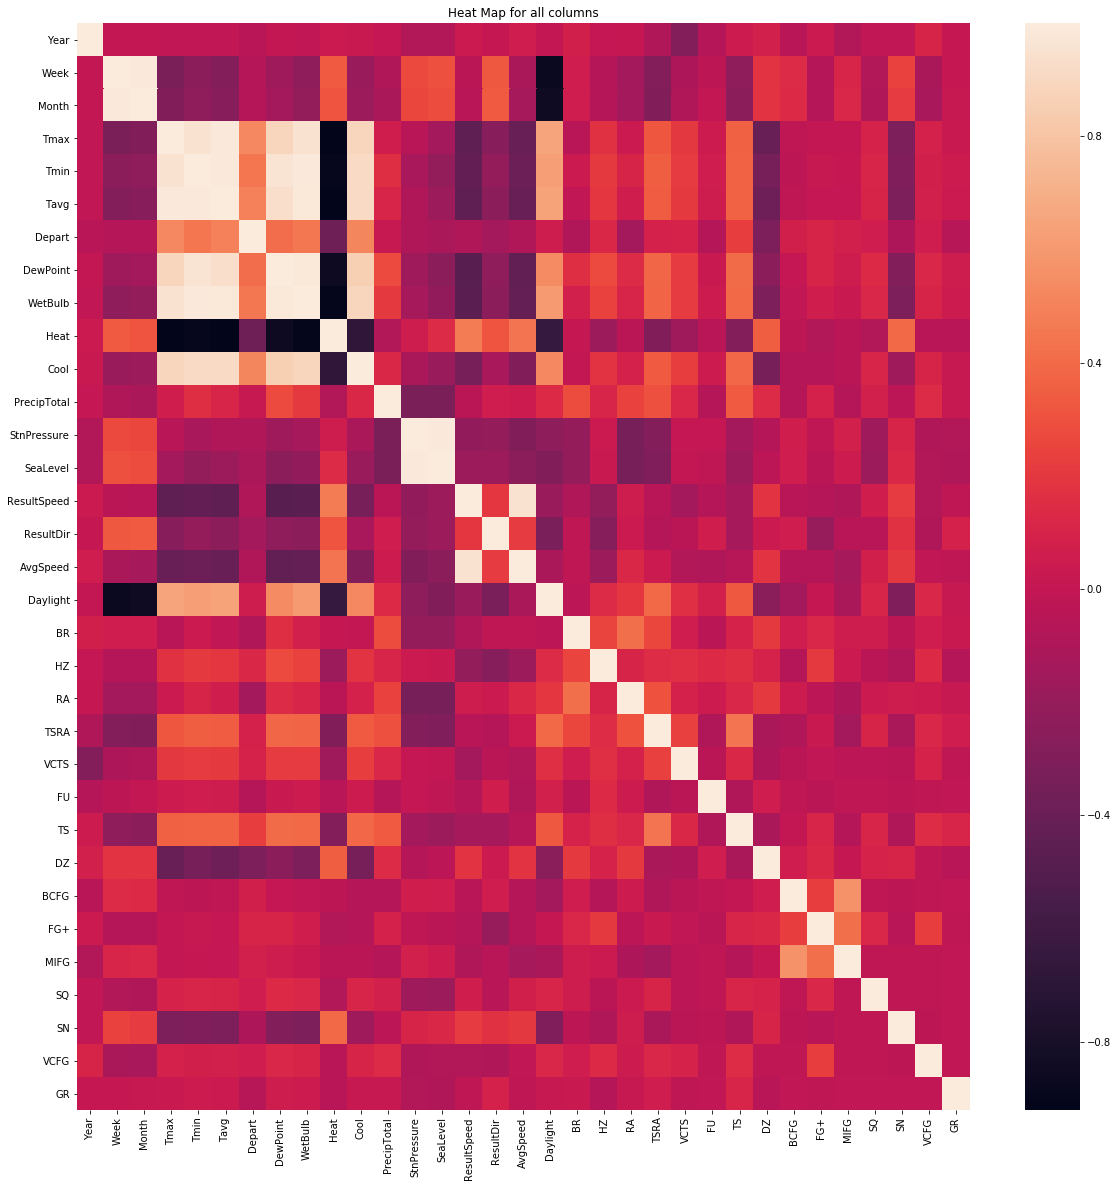

In [16]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(weather_2.corr(), ax = ax, annot=False, annot_kws={"size": 10})

#Since there are quite a number of correlated variables
#Will try to combine them via PCA later

In [17]:
weather_2.head(2)

,Year,Week,Month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007,22,5,69.250000,49.083333,59.416667,4.333333,40.500000,49.666667,6.000000,0.416667,0.001250,29.389167,30.075000,10.575000,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,23,5,75.642857,52.142857,64.000000,7.000000,45.857143,54.642857,3.142857,2.142857,0.011429,29.372143,30.066429,6.707143,11.714286,8.500,861.857143,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
weather_2.shape

(217, 33)

### Re-doing the preprocessing for train/test data as well to fit this weather data

In [19]:
train = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')

In [20]:
test = test.drop(['Id'], axis=1)

In [21]:
print(train.shape)
print(test.shape)

(10506, 12)
(116293, 10)


In [22]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [23]:
combined = pd.merge(train,test,how='outer')

In [24]:
combined.shape

(126799, 12)

In [25]:
combined = combined.drop(['Address','Block','Street','AddressNumberAndStreet','AddressAccuracy'],axis=1)

In [26]:
combined.head(2)

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991,1.0,0.0
1,2007-05-29,CULEX RESTUANS,T002,41.95469,-87.800991,1.0,0.0


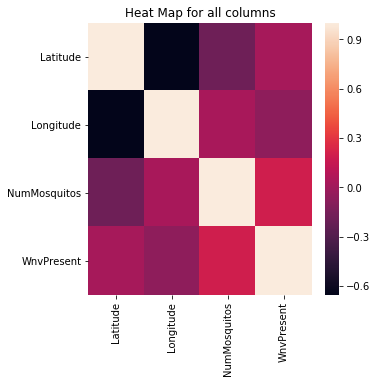

In [27]:
#to find out the general correlation between variables first
fig, ax = plt.subplots(figsize=(5,5)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(combined.corr(), ax = ax, annot=False, annot_kws={"size": 5})

#Not much correlation except for Lat/Long

In [28]:
#change Species into dummy variables
column = ['Species']

combined = pd.get_dummies(data = combined, prefix=column, columns = column, drop_first=True)

In [29]:
#changing Date to type - date
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Week'] = combined['Date'].dt.week
combined['Year'] = combined['Date'].dt.year
combined['Month'] = combined['Date'].dt.month
combined.head(2)


,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,22,2007,5
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,22,2007,5


In [30]:
combined.shape

(126799, 16)

In [31]:
weather_2.shape

(217, 33)

In [32]:
weather_2.head(2)

,Year,Week,Month,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007,22,5,69.250000,49.083333,59.416667,4.333333,40.500000,49.666667,6.000000,0.416667,0.001250,29.389167,30.075000,10.575000,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,23,5,75.642857,52.142857,64.000000,7.000000,45.857143,54.642857,3.142857,2.142857,0.011429,29.372143,30.066429,6.707143,11.714286,8.500,861.857143,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
full = pd.merge(combined,weather_2, on=['Year','Week'])

In [34]:
full.shape

(126799, 47)

In [35]:
full.head(5)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR
0,2007-05-29,T002,41.954690,-87.800991,1.0,0.0,0,1,0,0,0,0,0,22,2007,5,5,69.25,49.083333,59.416667,4.333333,40.5,49.666667,6.0,0.416667,0.00125,29.389167,30.075,10.575,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2007-05-29,T002,41.954690,-87.800991,1.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,69.25,49.083333,59.416667,4.333333,40.5,49.666667,6.0,0.416667,0.00125,29.389167,30.075,10.575,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2007-05-29,T007,41.994991,-87.769279,1.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,69.25,49.083333,59.416667,4.333333,40.5,49.666667,6.0,0.416667,0.00125,29.389167,30.075,10.575,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2007-05-29,T015,41.974089,-87.824812,1.0,0.0,0,1,0,0,0,0,0,22,2007,5,5,69.25,49.083333,59.416667,4.333333,40.5,49.666667,6.0,0.416667,0.00125,29.389167,30.075,10.575,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2007-05-29,T015,41.974089,-87.824812,4.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,69.25,49.083333,59.416667,4.333333,40.5,49.666667,6.0,0.416667,0.00125,29.389167,30.075,10.575,10.083333,12.075,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
#1st PCA using these 8 columns
COLUMNS = ['Tmax', 'Tmin', 'Tavg', 'Depart','DewPoint', 'WetBulb', 'Heat', 'Cool',]

X = full[COLUMNS]

In [37]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xn = ss.fit_transform(X)

In [38]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(Xn)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pc1_ev = pca.components_[0]
pc2_ev = pca.components_[1]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev, index=COLUMNS)

Tmax       -0.375475
Tmin       -0.380622
Tavg       -0.383208
Depart     -0.259686
DewPoint   -0.355270
WetBulb    -0.376853
Heat        0.316361
Cool       -0.362685
dtype: float64

In [40]:
full_pca = pca.transform(Xn)
full_pca = pd.DataFrame(full_pca, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS))],
                       index=full.index)
full_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,5.499201,1.828232,-0.612662,0.114946,0.221908,0.016664,0.007588,-4.836410e-15
1,5.499201,1.828232,-0.612662,0.114946,0.221908,0.016664,0.007588,-4.836410e-15
2,5.499201,1.828232,-0.612662,0.114946,0.221908,0.016664,0.007588,-4.836410e-15
3,5.499201,1.828232,-0.612662,0.114946,0.221908,0.016664,0.007588,-4.836410e-15
4,5.499201,1.828232,-0.612662,0.114946,0.221908,0.016664,0.007588,-4.836410e-15


In [41]:
exp_var = pca.explained_variance_ratio_
exp_var

array([8.40665060e-01, 9.09492355e-02, 4.29803722e-02, 2.23697932e-02,
       2.88293311e-03, 1.36753592e-04, 1.58522333e-05, 3.02339102e-30])

Text(0, 0.5, 'cumulative % of explained variance')

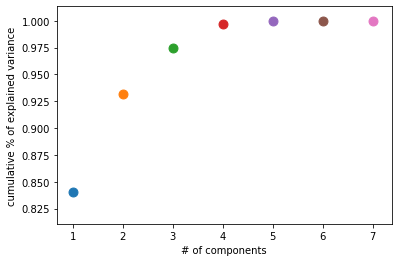

In [42]:
for i in range(1,len(pca.explained_variance_ratio_)):
    plt.scatter(i, sum(pca.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first two PC, PC1 and PC2 amounts to more than 95% of the information stored

In [43]:
pd.DataFrame({'PC1': pc1_ev, 'PC2': pc2_ev},
             index=COLUMNS)

,PC1,PC2
Tmax,-0.375475,0.070007
Tmin,-0.380622,-0.083862
Tavg,-0.383208,-0.006925
Depart,-0.259686,0.811856
DewPoint,-0.355270,-0.243133
WetBulb,-0.376853,-0.158970
Heat,0.316361,0.438920
Cool,-0.362685,0.227754


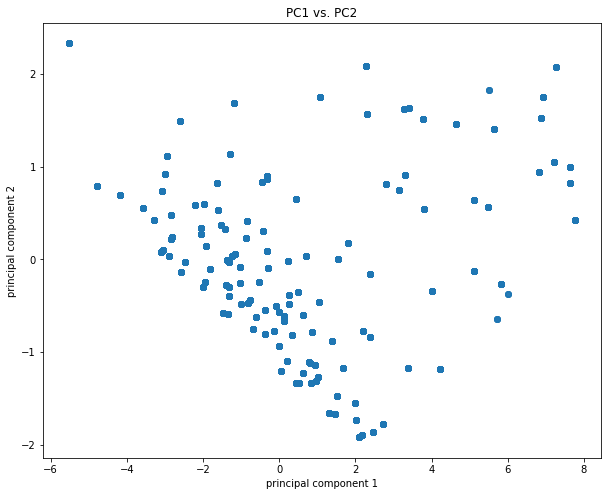

In [44]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(full_pca.PC1.values, full_pca.PC2.values, alpha=0.1)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [45]:
#2st PCA using these 5 columns
COLUMNS2 = ['PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir','AvgSpeed']

X2 = full[COLUMNS2]

In [46]:
ss = StandardScaler()
X2n = ss.fit_transform(X2)

pca2 = PCA()
pca2.fit(X2n)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
pc1_ev_2 = pca2.components_[0]
pc2_ev_2 = pca2.components_[1]
pc3_ev_2 = pca2.components_[2]
# Quick way of viewing, rather than looping through each feature
pd.Series(pc1_ev_2, index=COLUMNS2)

PrecipTotal   -0.296894
StnPressure    0.590473
SeaLevel       0.589044
ResultSpeed   -0.172263
ResultDir     -0.355435
AvgSpeed      -0.245385
dtype: float64

In [48]:
full_pca2 = pca2.transform(X2n)
full_pca2 = pd.DataFrame(full_pca2, 
                       columns=['PC'+str(i+1) for i in range(len(COLUMNS2))],
                       index=full.index)
full_pca2.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.919757,4.52349,0.334028,0.688429,0.112585,-0.001988
1,1.919757,4.52349,0.334028,0.688429,0.112585,-0.001988
2,1.919757,4.52349,0.334028,0.688429,0.112585,-0.001988
3,1.919757,4.52349,0.334028,0.688429,0.112585,-0.001988
4,1.919757,4.52349,0.334028,0.688429,0.112585,-0.001988


In [49]:
exp_var2 = pca2.explained_variance_ratio_
exp_var2

array([0.40768251, 0.31405429, 0.14070725, 0.12298941, 0.01299318,
       0.00157338])

Text(0, 0.5, 'cumulative % of explained variance')

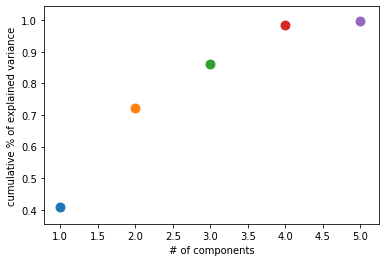

In [50]:
for i in range(1,len(pca2.explained_variance_ratio_)):
    plt.scatter(i, sum(pca2.explained_variance_ratio_[:i]), s=80)
plt.xlabel("# of components")
plt.ylabel('cumulative % of explained variance')

#The first 3 PCs, PC1,PC2,PC3 amounts to more than 80% of the information stored

In [51]:
pd.DataFrame({'PC1': pc1_ev_2, 'PC2': pc2_ev_2, 'PC3':pc3_ev_2},
             index=COLUMNS2)

,PC1,PC2,PC3
PrecipTotal,-0.296894,-0.202086,0.800436
StnPressure,0.590473,0.124661,0.339304
SeaLevel,0.589044,0.140036,0.336554
ResultSpeed,-0.172263,0.684947,0.068015
ResultDir,-0.355435,-0.173867,0.331521
AvgSpeed,-0.245385,0.651635,0.127959


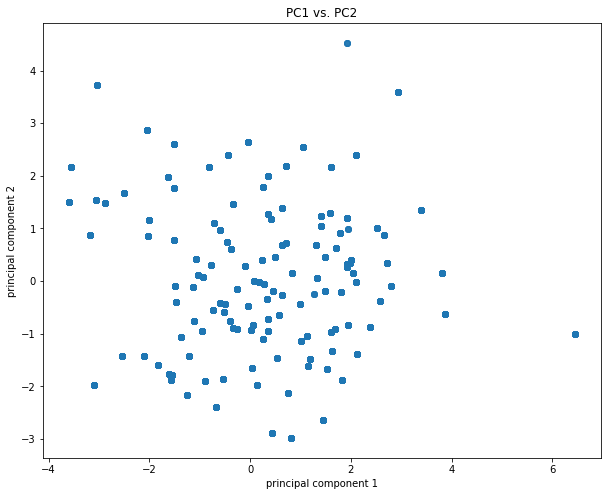

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(full_pca2.PC1.values, full_pca2.PC2.values, alpha=0.1)

ax.set_title('PC1 vs. PC2')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [53]:
#merging the data back together with weather
full = full.drop(COLUMNS,axis=1)
full = full.drop(COLUMNS2,axis=1)

In [54]:
full_2 = pd.concat([full, full_pca[['PC1','PC2']]],axis=1)

In [55]:
full_3 = pd.concat([full_2, full_pca2[['PC1','PC2']]],axis=1)

In [56]:
full_3.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349


In [57]:
train2 = full_3.loc[full['Year'].isin([2007,2009,2011,2013])]
test2 = full_3.loc[full['Year'].isin([2008,2010,2012,2014])]

In [58]:
print(train2.shape)
print(test2.shape)

(10506, 37)
(116293, 37)


In [59]:
train2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349


<function matplotlib.pyplot.legend(*args, **kwargs)>

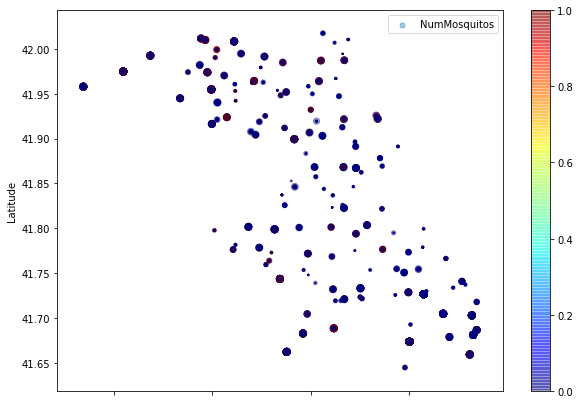

In [60]:
train2.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train2['NumMosquitos'], label='NumMosquitos', figsize=(10,7),
            c =train2['WnvPresent'], cmap = plt.get_cmap("jet"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

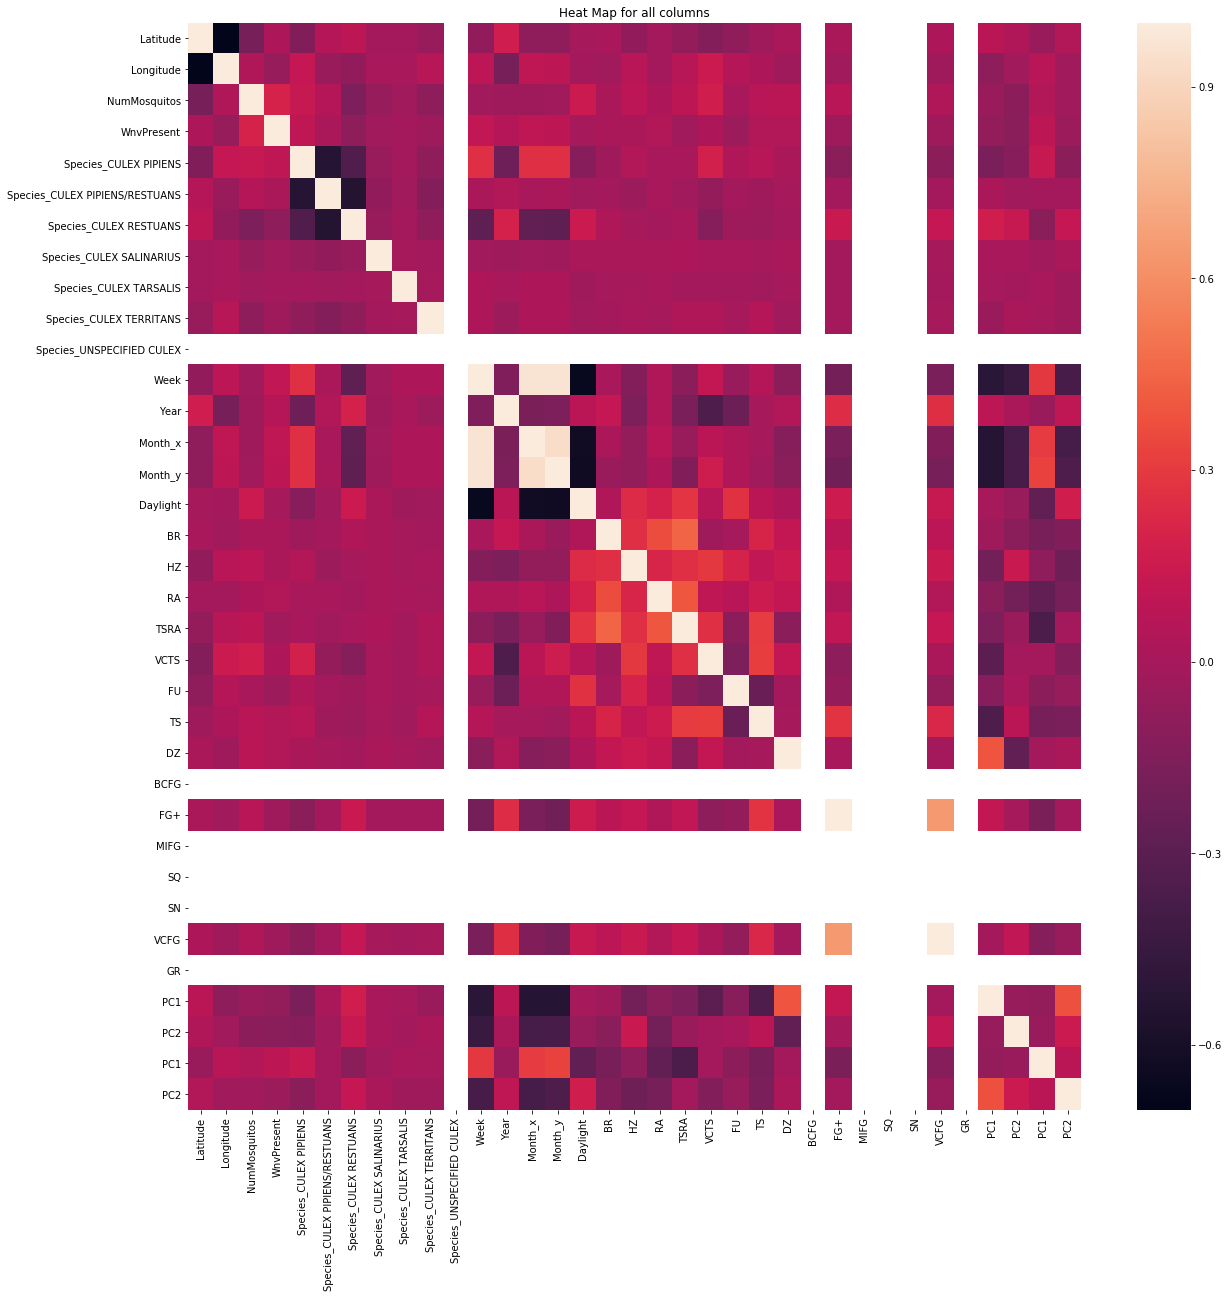

In [61]:
#to find out the general correlation between variables first
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(train2.corr(), ax = ax, annot=False, annot_kws={"size": 20})
#Again some correlation between the Long and Latitudes
#Some correlations between the species

In [62]:
corr_matrix = train2.corr()
corr_matrix['WnvPresent'].sort_values(ascending = False)

WnvPresent                        1.000000
NumMosquitos                      0.196820
Week                              0.104171
Month_x                           0.100143
Species_CULEX PIPIENS             0.096206
PC1                               0.093068
Month_y                           0.091773
Year                              0.050865
RA                                0.044672
DZ                                0.044464
TS                                0.043708
Latitude                          0.028697
VCTS                              0.025943
BR                                0.018649
Species_CULEX PIPIENS/RESTUANS    0.010960
HZ                                0.010155
Daylight                         -0.001951
Species_CULEX TARSALIS           -0.005624
Species_CULEX SALINARIUS         -0.021373
TSRA                             -0.023226
FG+                              -0.030547
VCFG                             -0.032548
Species_CULEX TERRITANS          -0.034566
FU         

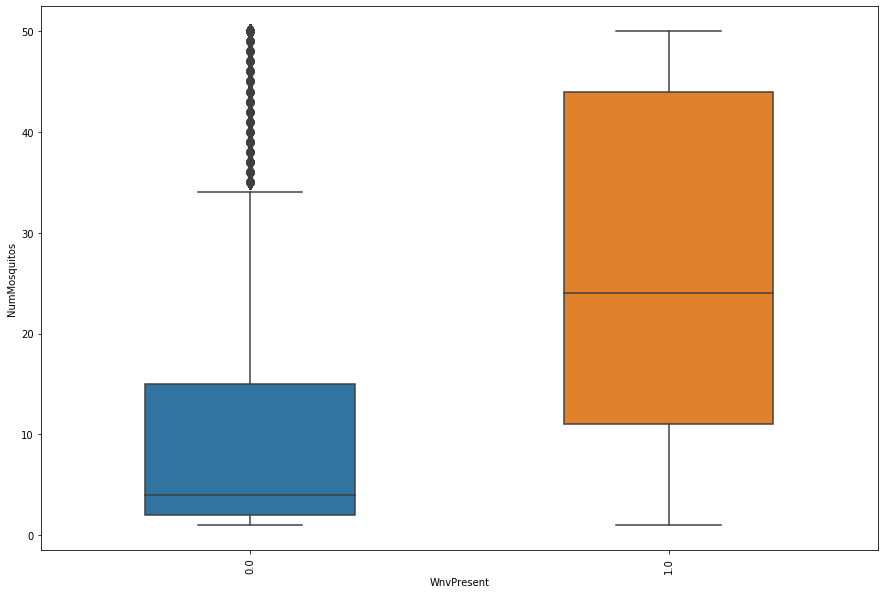

In [63]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
ax = sns.boxplot(y=train2.NumMosquitos, x=train2.WnvPresent, orient = 'v', width = 0.5, fliersize = 10).set(
    xlabel='WnvPresent', 
    ylabel='NumMosquitos')

#In general

In [64]:
corr_matrix['NumMosquitos'].sort_values(ascending = False)

NumMosquitos                      1.000000
WnvPresent                        0.196820
VCTS                              0.174037
Daylight                          0.147915
Species_CULEX PIPIENS             0.134754
TSRA                              0.093362
HZ                                0.088687
DZ                                0.077088
FG+                               0.075846
TS                                0.073097
Species_CULEX PIPIENS/RESTUANS    0.061499
PC1                               0.044669
Longitude                         0.036633
VCFG                              0.034441
RA                                0.029142
BR                                0.013516
FU                                0.002975
Species_CULEX TARSALIS           -0.017317
Month_y                          -0.017383
Week                             -0.020444
PC2                              -0.023334
Month_x                          -0.026040
Year                             -0.029611
PC1        

In [65]:
corr_matrix['Daylight'].sort_values(ascending = False)

Daylight                          1.000000
TSRA                              0.276483
FU                                0.267262
HZ                                0.241413
RA                                0.194280
PC2                               0.171347
FG+                               0.150239
NumMosquitos                      0.147915
Species_CULEX RESTUANS            0.143543
VCFG                              0.131086
Year                              0.081364
TS                                0.078300
VCTS                              0.066088
BR                                0.038339
DZ                                0.027936
Species_CULEX SALINARIUS          0.020616
PC1                               0.001751
WnvPresent                       -0.001951
Latitude                         -0.003558
Longitude                        -0.010480
Species_CULEX PIPIENS/RESTUANS   -0.018123
Species_CULEX TERRITANS          -0.023289
Species_CULEX TARSALIS           -0.029935
PC2        

In [66]:
train2.columns

Index(['Date', 'Trap', 'Latitude', 'Longitude', 'NumMosquitos', 'WnvPresent',
       'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX', 'Week', 'Year', 'Month_x', 'Month_y',
       'Daylight', 'BR', 'HZ', 'RA', 'TSRA', 'VCTS', 'FU', 'TS', 'DZ', 'BCFG',
       'FG+', 'MIFG', 'SQ', 'SN', 'VCFG', 'GR', 'PC1', 'PC2', 'PC1', 'PC2'],
      dtype='object')

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [68]:
train2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
0,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,1,0,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349
1,2007-05-29,T002,41.95469,-87.800991,1.0,0.0,0,0,1,0,0,0,0,22,2007,5,5,846.666667,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5.499201,1.828232,1.919757,4.52349


In [69]:
columns = ['Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS',
       'Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS',
       'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS',
       'Species_UNSPECIFIED CULEX']

for i in columns:
    train2[i] = train2[i].astype(int).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [70]:
train2.dtypes

Date                              datetime64[ns]
Trap                                      object
Latitude                                 float64
Longitude                                float64
NumMosquitos                             float64
WnvPresent                               float64
Species_CULEX PIPIENS                    float64
Species_CULEX PIPIENS/RESTUANS           float64
Species_CULEX RESTUANS                   float64
Species_CULEX SALINARIUS                 float64
Species_CULEX TARSALIS                   float64
Species_CULEX TERRITANS                  float64
Species_UNSPECIFIED CULEX                float64
Week                                       int64
Year                                       int64
Month_x                                    int64
Month_y                                    int64
Daylight                                 float64
BR                                         int64
HZ                                         int64
RA                  

In [71]:
train2 = train2.drop(['Month_x','Month_y'], axis=1)

### Selecting columns to include to X

In [72]:
X = pd.concat([train2.iloc[:,2:4],train2.iloc[:,6:13],train2.iloc[:,15:35]],axis = 1)
ss = StandardScaler()
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
y = train2.WnvPresent

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [73]:
#Train,test split
X_train, X_test, y_train, y_test = train_test_split(Xs, y, random_state=42 , train_size=0.7 , test_size=0.3,stratify=y)

In [74]:
#we now begin to oversample our Wnv VIRUS events
A=pd.concat([X_train, y_train], axis=1)

In [75]:
# separate minority and majority classes
no_virus = A[A.WnvPresent==0]
virus = A[A.WnvPresent==1]
print(len(no_virus))
print(len(virus))

6968
386


In [76]:
(386)/(6968+386)

0.05248844166440032

In [77]:
# upsample minority
from sklearn.utils import resample
virus_upsampled = resample(virus,
                          replace = True,                         # sample with replacement
                          n_samples = int(0.5*len(no_virus)),     # increase from 5% to 35%
                          random_state = 27)                      # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_virus, virus_upsampled])

# check new class counts
upsampled.WnvPresent.value_counts()

0.0    6968
1.0    3484
Name: WnvPresent, dtype: int64

In [78]:
y_train = upsampled.WnvPresent
X_train = upsampled.drop('WnvPresent', axis=1)

In [79]:
model = []
parameters = []
scores = []
precision = []
recall = []
ra_score = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass', 'GradientBoost']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf']}, #SVC - 'something wrong with 'sigmoid','poly','linear'
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
    
    {'clf__loss' : ['deviance', 'exponential'],
     'clf__n_estimators':[50,75,100,200,500],
     'clf__max_features': [None, 'auto','sqrt','log2']} #GradientBoosting
]

for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        # not sure if we need to scale the X
        # removed ('ss', StandardScaler),
        ('clf', estimator)
    ])
#     cv = StratifiedKFold(shuffle=True, n_splits=3)
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_train, y_train)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    conf_matrix = confusion_matrix(y_test, pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'. format(tp/(tp+fp)))
    print('Recall of the model is {}'.format(tp/(tp+fn)))
    
    #roc_auc
    ra = roc_auc_score(y_test, pred)
    print ('ROC_AUC: {}'.format(ra))
   
    
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(accuracy_score(y_test, pred))
    recall.append(tp/(tp+fn))
    precision.append(tp/(tp+fp))
    ra_score.append(ra) 
    
results = pd.DataFrame({'model': model, 
              'parameters': parameters, 
              'scores': scores, 
              'recall': recall, 
              'precision': precision,
              'roc_auc':ra_score
                       })
results

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1982s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  74 out of 108 | elapsed:    2.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Decision Tree
Best Score: 0.9391040969233222
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 5}
Model Score on X_train: 0.9649827784156142
Accuracy score of prediction: 0.8892766497461929
TN: 2751, FP:236, FN:113, TP:52
Precision of the model is 0.18055555555555555
Recall of the model is 0.3151515151515151
ROC_AUC: 0.6180712379908898


Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1277s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RandomForest
Best Score: 0.9475530049418142
Best Params: {'clf__max_depth': 50, 'clf__min_samples_split': 5}
Model Score on X_train: 0.9648871029468045
Accuracy score of prediction: 0.8965736040609137
TN: 2781, FP:206, FN:120, TP:45
Precision of the model is 0.17928286852589642
Recall of the model is 0.2727272727272727
ROC_AUC: 0.6018808777429467


Fitting 3 folds for each of 96 candidates, totalling 288 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    9.9s
[Paralle

LogReg
Best Score: 0.7457356926510441
Best Params: {'clf__C': 5, 'clf__max_iter': 175, 'clf__solver': 'saga'}
Model Score on X_train: 0.7479908151549942
Accuracy score of prediction: 0.8236040609137056
TN: 2502, FP:485, FN:71, TP:94
Precision of the model is 0.16234887737478412
Recall of the model is 0.5696969696969697
ROC_AUC: 0.7036633492609389


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  2.2min remaining:   16.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.9min finished


KNN
Best Score: 0.9239598278335724
Best Params: {'clf__n_neighbors': 3, 'clf__p': 1, 'clf__weights': 'distance'}
Model Score on X_train: 0.9239380022962113
Accuracy score of prediction: 0.9048223350253807
TN: 2821, FP:166, FN:134, TP:31
Precision of the model is 0.15736040609137056
Recall of the model is 0.18787878787878787
ROC_AUC: 0.5661523166042751


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.2s finished
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC
Best Score: 0.7970667941973537
Best Params: {'clf__kernel': 'rbf'}
Model Score on X_train: 0.8027171833141983
Accuracy score of prediction: 0.8267766497461929
TN: 2523, FP:464, FN:82, TP:83
Precision of the model is 0.15173674588665448
Recall of the model is 0.503030303030303
ROC_AUC: 0.6738452486025301


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    0.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    0.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    1.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    1.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    3.0s finished


AdaBoost
Best Score: 0.7943567670970827
Best Params: {'clf__n_estimators': 500}
Model Score on X_train: 0.8058744737849215
Accuracy score of prediction: 0.8334390862944162
TN: 2530, FP:457, FN:68, TP:97
Precision of the model is 0.17509025270758122
Recall of the model is 0.5878787878787879
ROC_AUC: 0.7174412352517474


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0422s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 out of 108 | elapsed:    0.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.3s finished


BaggingClass
Best Score: 0.7046070460704607
Best Params: {'clf__max_features': 10, 'clf__max_samples': 10, 'clf__n_estimators': 100}
Model Score on X_train: 0.6963260619977037
Accuracy score of prediction: 0.940989847715736
TN: 2941, FP:46, FN:140, TP:25
Precision of the model is 0.352112676056338
Recall of the model is 0.15151515151515152
ROC_AUC: 0.5680575422791694


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:   13.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.4s finished


GradientBoost
Best Score: 0.8837876614060258
Best Params: {'clf__loss': 'deviance', 'clf__max_features': None, 'clf__n_estimators': 500}
Model Score on X_train: 0.9091083046306927
Accuracy score of prediction: 0.8581852791878173
TN: 2625, FP:362, FN:85, TP:80
Precision of the model is 0.18099547511312217
Recall of the model is 0.48484848484848486
ROC_AUC: 0.6818283267898266




,model,parameters,scores,recall,precision,roc_auc
0,Decision Tree,"{'clf__max_depth': None, 'clf__min_samples_spl...",0.889277,0.315152,0.180556,0.618071
1,RandomForest,"{'clf__max_depth': 50, 'clf__min_samples_split...",0.896574,0.272727,0.179283,0.601881
2,LogReg,"{'clf__C': 5, 'clf__max_iter': 175, 'clf__solv...",0.823604,0.569697,0.162349,0.703663
3,KNN,"{'clf__n_neighbors': 3, 'clf__p': 1, 'clf__wei...",0.904822,0.187879,0.157360,0.566152
4,SVC,{'clf__kernel': 'rbf'},0.826777,0.503030,0.151737,0.673845
5,AdaBoost,{'clf__n_estimators': 500},0.833439,0.587879,0.175090,0.717441
6,BaggingClass,"{'clf__max_features': 10, 'clf__max_samples': ...",0.940990,0.151515,0.352113,0.568058
7,GradientBoost,"{'clf__loss': 'deviance', 'clf__max_features':...",0.858185,0.484848,0.180995,0.681828


### The following section is added to check the predict_proba scores

#### P/S: wasn't able to add this into the loop, so it was done manually instead

In [80]:
estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier()]

In [81]:
model = DecisionTreeClassifier(max_depth = 10 , min_samples_split=25)
DTC = model.fit(X_train, y_train)
pred = DTC.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7489819520954439

In [82]:
model = RandomForestClassifier(max_depth = 100 , min_samples_split=30)
RF = model.fit(X_train, y_train)
pred = RF.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7937973643363667

In [83]:
model = LogisticRegression(C=3, max_iter=175 , solver='lbfgs')
LogReg = model.fit(X_train, y_train)
pred = LogReg.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8052571243063376

In [84]:
model = KNeighborsClassifier(n_neighbors=25, p=2, weights='uniform')
Knn = model.fit(X_train, y_train)
pred = Knn.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.7559799535360296

In [85]:
model = SVC(kernel='rbf', probability=True)
svc = model.fit(X_train, y_train)
pred = svc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8013533392174169

In [86]:
model = AdaBoostClassifier(n_estimators=25)
Ada = model.fit(X_train, y_train)
pred = Ada.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8244392366923334

In [87]:
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8343082651083991

### Use this as our final model

In [88]:
#use this final model
model = GradientBoostingClassifier(loss='exponential', max_features='log2', n_estimators=200)
GB = model.fit(X_train, y_train)
pred = GB.predict_proba(X_test)[:,1]
roc_auc_score(y_test, pred)

0.8332471010743526

### Preprocessing the same way for the test set

In [89]:
test2.head(2)

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
10506,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,1,0,0,0,0,0,24,2008,6,5,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439
10507,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,1,0,0,0,0,24,2008,6,5,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439


In [90]:
test2.iloc[:,6:20].head(1)

,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Month_x,Month_y,Daylight,BR,HZ
10506,0,1,0,0,0,0,0,24,2008,6,5,872.0,1,0


In [91]:
test2 = test2.drop(['Month_x','Month_y'], axis=1)

In [92]:
X = pd.concat([test2.iloc[:,2:4],test2.iloc[:,6:13],test2.iloc[:,15:35]],axis = 1)
Xs = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [93]:
final_pred = model.predict_proba(Xs)[:,1]

In [94]:
final_pred.shape

(116293,)

### From the final prediction, combine to create a new database for submission

In [95]:
sample = pd.read_csv('../assets/samplesubmission.csv')
sub = pd.DataFrame()
sub['Id']=sample['Id']
sub['WnvPresent'] = final_pred
print(sub.shape)
sub.head()

(116293, 2)


,Id,WnvPresent
0,1,0.002115
1,2,0.001202
2,3,0.002007
3,4,0.002081
4,5,0.002081


In [96]:
sub.to_csv('submission/sub6.csv',index=False)

### To visualise the location with the probability of virus happnening

In [97]:
test2.head()

,Date,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Species_UNSPECIFIED CULEX,Week,Year,Daylight,BR,HZ,RA,TSRA,VCTS,FU,TS,DZ,BCFG,FG+,MIFG,SQ,SN,VCFG,GR,PC1,PC2,PC1,PC2
10506,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,1,0,0,0,0,0,24,2008,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439
10507,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,1,0,0,0,0,24,2008,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439
10508,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,1,0,0,0,0,0,0,24,2008,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439
10509,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,0,1,0,0,0,24,2008,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439
10510,2008-06-11,T002,41.95469,-87.800991,NaN,NaN,0,0,0,0,0,1,0,24,2008,872.0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,7.638298,0.992186,-2.03579,0.851439


In [98]:
sub['Latitude']=test['Latitude']
sub['Longitude']=test['Longitude']

In [99]:
sub.WnvPresent.sort_values(ascending = False)

25857     0.914336
25859     0.905713
26559     0.895528
26638     0.895528
110428    0.893535
110430    0.888378
26424     0.888186
25860     0.882967
25862     0.882967
25864     0.882967
25863     0.882967
25861     0.882967
26422     0.878655
112561    0.877312
109201    0.873667
26615     0.872213
111444    0.871726
112473    0.871726
111908    0.871726
111428    0.871717
110431    0.869970
110435    0.869970
110434    0.869970
110432    0.869970
110433    0.869970
26613     0.868275
109203    0.868144
111572    0.867407
26408     0.866512
26640     0.863878
            ...   
95166     0.000048
31208     0.000048
31209     0.000048
31205     0.000048
31206     0.000048
31207     0.000048
31489     0.000047
31492     0.000047
31490     0.000047
31493     0.000047
31491     0.000047
30788     0.000046
95037     0.000046
30780     0.000043
30988     0.000042
94661     0.000041
94291     0.000039
94460     0.000039
31204     0.000037
94452     0.000036
31488     0.000036
31363     0.

<function matplotlib.pyplot.legend(*args, **kwargs)>

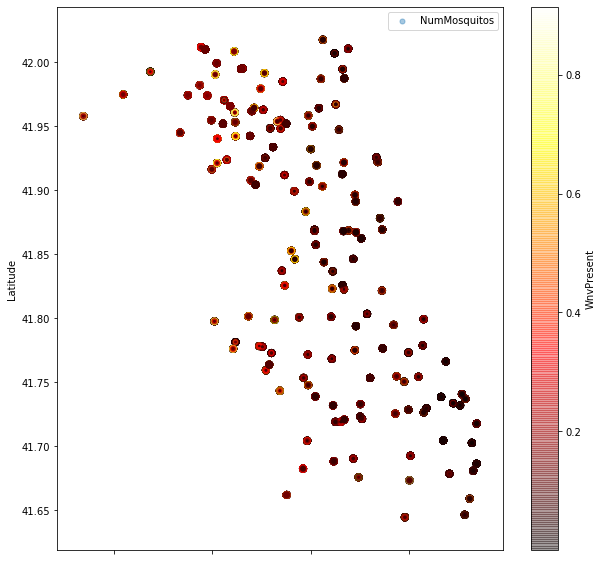

In [100]:
sub.plot(kind='scatter', x= 'Longitude', y='Latitude', alpha=0.4,
             s=train['NumMosquitos'], label='NumMosquitos', figsize=(10,10),
            c ='WnvPresent', cmap = plt.get_cmap("hot"),colorbar=True)
plt.legend

#Size of circle = Number of Mosquitos
#Colour['Red'] = WNV Present

In [101]:
sub[['Longitude', 'Latitude']][sub.WnvPresent>0.8].drop_duplicates().shape

(44, 2)

In [102]:
mapdata = np.loadtxt("../predict-west-nile-virus/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../datasets/train.csv')[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,20))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)


locations = sub[['Longitude', 'Latitude','WnvPresent']].drop_duplicates().values
l2 = sub[['Longitude', 'Latitude','WnvPresent']][sub.WnvPresent>0.8].drop_duplicates().values

plt.scatter(l2[:,0], l2[:,1], marker='*',
           c = l2[:,2], cmap = plt.get_cmap("Reds"))
plt.scatter(locations[:,0], locations[:,1], marker='o',
           c = locations[:,2], cmap = plt.get_cmap("winter"))


plt.savefig('heatmap.png')

FileNotFoundError: [Errno 2] File b'../datasets/train.csv' does not exist: b'../datasets/train.csv'